In [ ]:
# MLP with automatic validation set
import pandas
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
import math 
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
import numpy

In [ ]:
dataframe = pandas.read_excel('Test1 (1).xlsx') 
dataframe.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Fitness
0,10,0,4,14,3,2,15,13,9,7,5,12,11,1,6,8,4.0
1,5,6,7,8,4,0,9,15,1,2,13,10,12,3,11,14,4.0
2,2,12,5,13,10,0,3,4,11,8,14,9,1,15,6,7,4.0
3,6,12,7,14,15,9,8,4,0,5,13,10,11,2,3,1,4.0
4,5,14,8,2,15,4,6,12,13,11,10,1,9,0,7,3,4.0


In [ ]:
# Assigning the input data into (X) 
from sklearn.preprocessing import MinMaxScaler 

X = np.array(dataframe.drop(['Fitness'],1)).astype(int)

# Assigning the target data into (y)

y = np.array(dataframe['Fitness'])



### Normalization: DL are sensitive to the scale of the data. so we apply MinMax Scaler to normalize the dataframe  

scaler = MinMaxScaler(feature_range=(0,1))
X = scaler.fit_transform(np.array(X).reshape(-1,1))
X = X.reshape(y.shape[0],16)
y = scaler.fit_transform(np.array(y).reshape(-1,1))


print(X.shape)
print(y.shape)

(10113, 16)
(10113, 1)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [ ]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow import keras
import keras
from tensorflow.keras import optimizers

In [ ]:
model=Sequential()
model.add(LSTM(96, return_sequences=False, activation='relu', input_shape=(16,1,)))
model.add(Dense(64,activation='relu'))
model.add(Dense(1))
optimizer = optimizers.Adam(learning_rate=0.001)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 96)                37632     
                                                                 
 dense (Dense)               (None, 64)                6208      
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 43,905
Trainable params: 43,905
Non-trainable params: 0
_________________________________________________________________


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score
 
kf = KFold(n_splits=7, random_state=30, shuffle=True)
scores = []
r_square = []
rmse = []
MAPE = []
mse = []
corr = []
for i, (train_index, test_index) in enumerate(kf.split(X)):
    X_train = X[train_index,:]
    y_train = y[train_index]
    X_test = X[test_index,:]
    y_test = y[test_index]
    
    #reshape input to be [samples, time steps, features] wich is required for LSTM 
    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1],1)
    

    # fit the model with the training data
    
    model.fit(X_train,y_train, validation_data=(X_test, y_test), epochs=25,verbose=1)
    
    
    y_pred = model.predict(X_test)
    #r_square = r2_score(y_pred,y_test)
    r = r2_score(y_pred,y_test)
    r_square.append(round(r, 4))
    
    from sklearn.metrics import mean_squared_error
    ### Test Data RMSE
    rmse_prediction = math.sqrt(mean_squared_error(y_test,y_pred))
    rmse.append(round(rmse_prediction, 4))
    
    from sklearn.metrics import mean_absolute_percentage_error
    
    MAPE_value = mean_absolute_percentage_error(y_pred,y_test)
    MAPE.append(round(MAPE_value,4))
    
    mse_value = mean_squared_error(y_test,y_pred)
    mse.append(round(mse_value,4))
    
    '''Running the example calculates and prints the Pearson’s correlation coefficient.
            We can see that the two variables are positively correlated and that the correlation is 0.8.
            This suggests a high level of correlation, e.g. a value above 0.5 and close to 1.0.'''
    
    from scipy.stats import pearsonr
    corr_value, _ = pearsonr(y_test.flatten(), y_pred.flatten())
    corr.append(round(corr_value,4))


print('R^2 Square:', r_square)
print(min(r_square), round(np.mean(r_square),4), max(r_square))

print('Root Mean Square Error:', rmse)
print(min(rmse), round(np.mean(rmse),4), max(rmse))

print('Mean Absolute Percentage Error:', MAPE)
print(min(MAPE), round(np.mean(MAPE),4), max(MAPE))

print('Mean Square Error:',mse)
print(min(mse), round(np.mean(mse),4), max(mse))

print('Pearsons correlation:', corr)
print(min(corr), round(np.mean(corr),4), max(corr))


Epoch 1/25
271/271 [==============================] - 11s 28ms/step - loss: 0.0111 - accuracy: 0.9853 - val_loss: 0.0092 - val_accuracy: 0.9882
Epoch 2/25
271/271 [==============================] - 7s 26ms/step - loss: 0.0104 - accuracy: 0.9853 - val_loss: 0.0085 - val_accuracy: 0.9882
Epoch 3/25
271/271 [==============================] - 7s 27ms/step - loss: 0.0077 - accuracy: 0.9875 - val_loss: 0.0040 - val_accuracy: 0.9945
Epoch 4/25
271/271 [==============================] - 7s 26ms/step - loss: 0.0050 - accuracy: 0.9916 - val_loss: 0.0031 - val_accuracy: 0.9952
Epoch 5/25
271/271 [==============================] - 7s 25ms/step - loss: 0.0038 - accuracy: 0.9930 - val_loss: 0.0032 - val_accuracy: 0.9952
Epoch 6/25
271/271 [==============================] - 6s 23ms/step - loss: 0.0039 - accuracy: 0.9932 - val_loss: 0.0033 - val_accuracy: 0.9945
Epoch 7/25
271/271 [==============================] - 4s 15ms/step - loss: 0.0032 - accuracy: 0.9938 - val_loss: 0.0029 - val_accuracy: 0.995

In [ ]:
### Transformback to original form
y_test = scaler.inverse_transform(y_test)
y_pred = scaler.inverse_transform(y_pred)

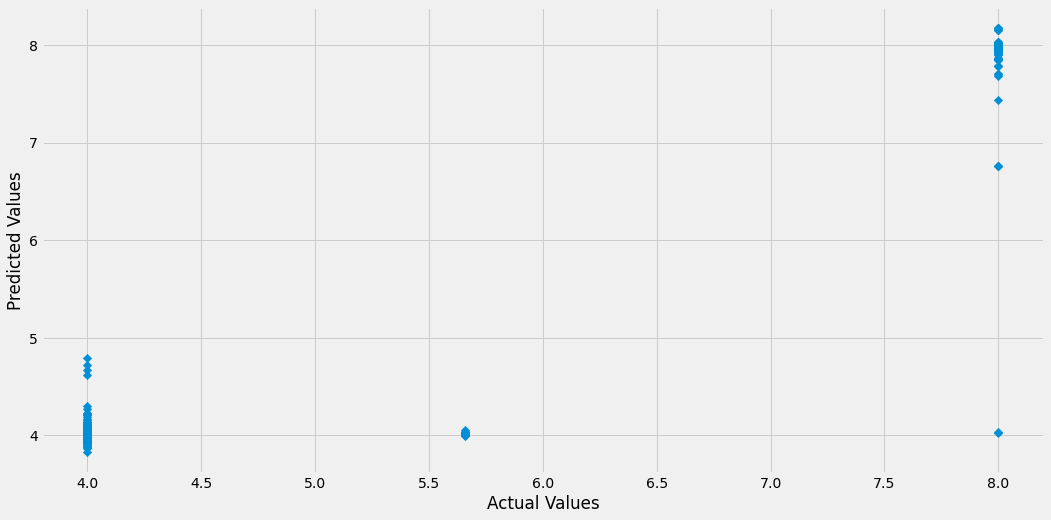

In [ ]:
#spilit data 
from sklearn.model_selection import train_test_split

X= X.reshape(X.shape[0], X.shape[1], 1)

pred = model.predict(X)
y = scaler.inverse_transform(y)
pred = scaler.inverse_transform(pred)

pred_rnn = model.predict(X_test)
pred_rnn = scaler.inverse_transform(pred_rnn)

import matplotlib.pyplot as plt 


plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.scatter(y,pred, marker='D')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
#plt.savefig('C:/Users/CL/Pictures/PathLoss/rnn_img6.png', dpi=500,bbox_inches='tight')
plt.show()
#plt.title('Path Loss')

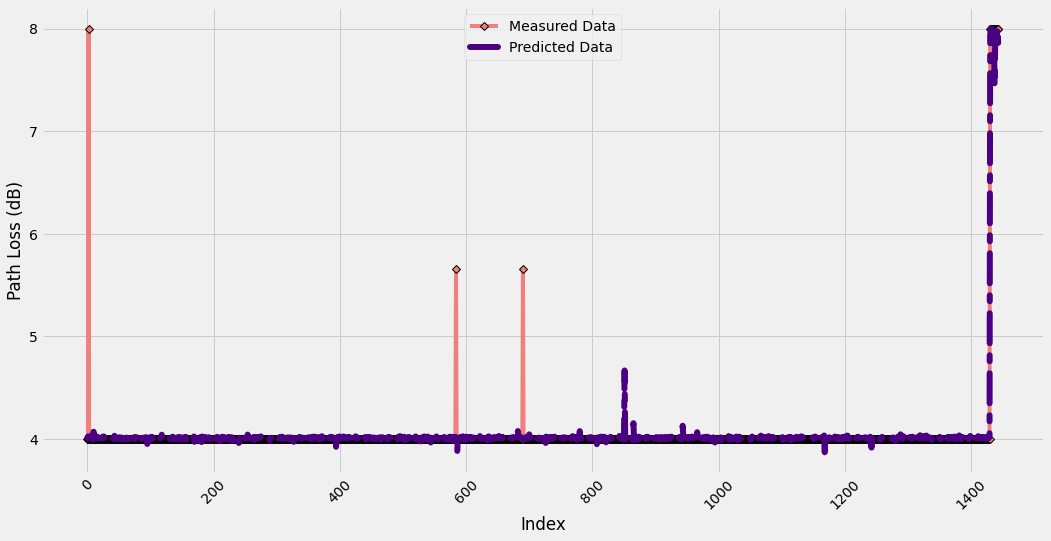

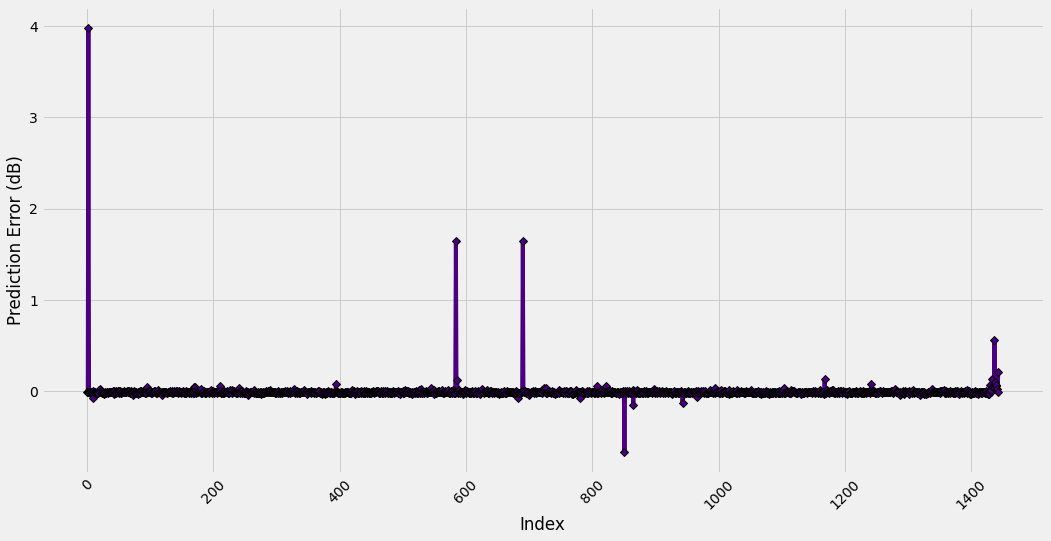

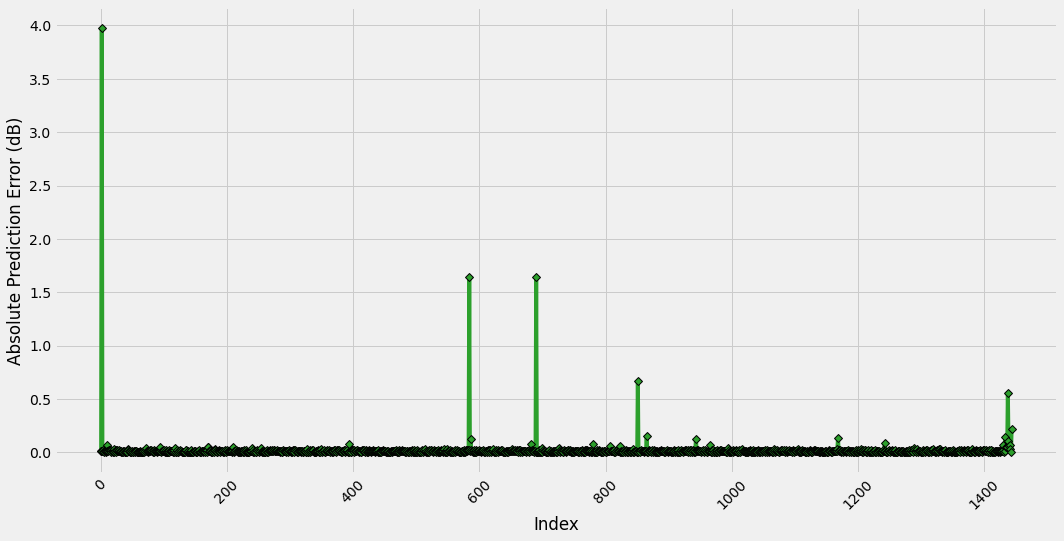

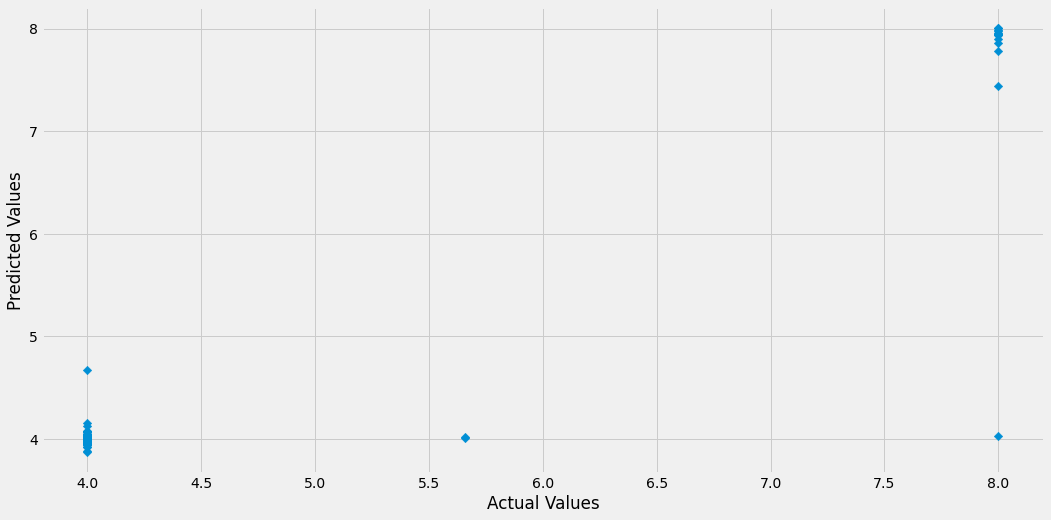

In [ ]:
import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(y_test, label = 'Measured Data', color='lightcoral', marker='D', markeredgecolor='black')
plt.plot(y_pred, label = 'Predicted Data', color='#4b0082', linewidth=6,
         linestyle=(0, (5, 2, 1, 2)), dash_capstyle='round')
#plt.title('Path Loss Prediction (RMSE =  1.6270657623983986 )')
plt.xlabel('Index')
plt.ylabel('Path Loss (dB)')
plt.legend()
plt.xticks(rotation=45)
#plt.savefig('C:/Users/CL/Pictures/PathLoss/rnn_img1.png', dpi=500, bbox_inches='tight')
plt.show()


import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot((y_test - y_pred), color='#4b0082', marker='D', markeredgecolor='black')
#plt.title('Path Loss Prediction (RMSE =  1.6270657623983986 )')
plt.xlabel('Index')
plt.ylabel('Prediction Error (dB)')
plt.xticks(rotation=45)
#plt.savefig('C:/Users/CL/Pictures/PathLoss/rnn_img2.png', dpi=500, bbox_inches='tight')
plt.show()


import matplotlib.pyplot as plt 
plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(abs(y_test - y_pred), color='#2ca02c', marker='D', markeredgecolor='black')
#plt.title('Path Loss Prediction (RMSE =  1.6270657623983986 )')
plt.xlabel('Index')
plt.ylabel('Absolute Prediction Error (dB)')
plt.xticks(rotation=45)
#plt.savefig('C:/Users/CL/Pictures/PathLoss/rnn_img3.png', dpi=500, bbox_inches='tight')
plt.show()

plt.figure(figsize=(16,8))
plt.scatter(y_test,y_pred, marker='D')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
#plt.savefig('C:/Users/CL/Pictures/PathLoss/rnn_img4.png', dpi=500,bbox_inches='tight')
plt.show()